In [1]:
import osmnx as om
import matplotlib.pyplot as plt
import networkx as nx # for route analysis
import geopandas as gpd
import pandas as pd

In [2]:
place_address = "800 University Drive, Maryville, MO 64468"

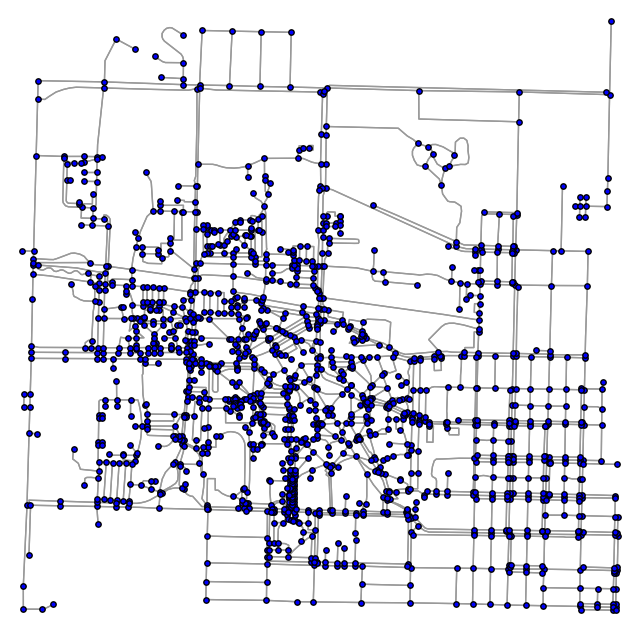

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [3]:
# plot map of all routes combined
college = om.graph_from_address(place_address, dist=850, dist_type='bbox', network_type='walk')
om.plot_graph(college, bgcolor="white", node_color="blue",node_edgecolor="black")

In [4]:
# # buildings
# tags = {'amenity':['university', 'fast_food', 'library', 'bicycle_parking', 'parking', 'motorcycle_parking', 'post_office', 'cafe', 'fountain'],
        
#        'building':['college', 'bridge', 'church', 'warehouse', 'residential', 'house', 'dormitory', 'apartments', 'greenhouse'],
#         'footway': ['sidewalk', 'crossing'],
#         'landuse': ['education', 'residential'],
#         'leisure': ['fitness_centre', 'garden', 'park', 'pitch', 'playground', 'stadium', 'track'],
#        'manmade': ['tower', 'water_tower'],
#         'historic': ['monument', 'memorial'],
#         'natural': 'peak',
#         'tourism': 'artwork'}
# amenities = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
# amenities

In [5]:
# amenities
tags = {'amenity':['fast_food', 'library', 'bicycle_parking', 'parking', 'motorcycle_parking', 'post_office', 'cafe', 'fountain']}
amenities = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
amenities

geometry  \
element_type osmid                                                           
node         8359369722                         POINT (-94.88305 40.34981)   
             8359737816                         POINT (-94.89232 40.35141)   
             8365352081                         POINT (-94.88305 40.35087)   
             8365352082                         POINT (-94.88374 40.35169)   
             8365352083                         POINT (-94.88262 40.35108)   
...                                                                    ...   
way          920577654   POLYGON ((-94.88077 40.35426, -94.88077 40.354...   
             1053484295  POLYGON ((-94.87484 40.34918, -94.87470 40.349...   
             1053484296  POLYGON ((-94.87464 40.34930, -94.87465 40.349...   
             1054545162  POLYGON ((-94.87317 40.35062, -94.87317 40.350...   
relation     12239430    POLYGON ((-94.88424 40.35343, -94.88436 40.353...   

                                 amenity   brand brand:wikidata   cuisine  \
element_type osmid                                                          
node         8359369722         fountain     NaN            NaN       NaN   
             8359737816          parking     NaN            NaN       NaN   
             8365352081  bicycle_parking     NaN            NaN       NaN   
             8365352082  bicycle_parking     NaN            NaN       NaN   
             8365352083  bicycle_parking     NaN            NaN       NaN   
...                                  ...     ...            ...       ...   
way          920577654           parking     NaN            NaN       NaN   
             1053484295        fast_food     NaN            NaN  sandwich   
             1053484296          parking     NaN            NaN       NaN   
             1054545162        fast_food  Subway        Q244457  sandwich   
relation     12239430            parking     NaN            NaN       NaN   

                        drive_through level        name takeaway alt_name  \
element_type osmid                                                          
node         8359369722           NaN   NaN         NaN      NaN      NaN   
             8359737816           NaN   NaN         NaN      NaN      NaN   
             8365352081           NaN   NaN         NaN      NaN      NaN   
             8365352082           NaN   NaN         NaN      NaN      NaN   
             8365352083           NaN   NaN         NaN      NaN      NaN   
...                               ...   ...         ...      ...      ...   
way          920577654            NaN   NaN         NaN      NaN      NaN   
             1053484295           NaN   NaN  Planet Sub      NaN      NaN   
             1053484296           NaN   NaN         NaN      NaN      NaN   
             1054545162           NaN   NaN      Subway      yes      NaN   
relation     12239430             NaN   NaN      Lot 25      NaN      NaN   

                         ... payment:debit_cards diet:gluten_free  \
element_type osmid       ...                                        
node         8359369722  ...                 NaN              NaN   
             8359737816  ...                 NaN              NaN   
             8365352081  ...                 NaN              NaN   
             8365352082  ...                 NaN              NaN   
             8365352083  ...                 NaN              NaN   
...                      ...                 ...              ...   
way          920577654   ...                 NaN              NaN   
             1053484295  ...                 NaN              NaN   
             1053484296  ...                 NaN              NaN   
             1054545162  ...                 NaN              NaN   
relation     12239430    ...                 NaN              NaN   

                                                                     nodes  \
element_type osmid                                                     

In [6]:
# buildings
tags = {'building': True}
buildings = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
buildings

amenity  \
element_type osmid                   
way          191556763         NaN   
             191556765         NaN   
             191556767         NaN   
             191557894         NaN   
             191557898         NaN   
...                            ...   
             1054549112        NaN   
             1054549113        NaN   
             1057035945        NaN   
             1103579454  ice_cream   
             1103579455        NaN   

                                                                  geometry  \
element_type osmid                                                           
way          191556763   POLYGON ((-94.88362 40.35137, -94.88336 40.351...   
             191556765   POLYGON ((-94.88460 40.35122, -94.88403 40.351...   
             191556767   POLYGON ((-94.88314 40.35104, -94.88266 40.350...   
             191557894   POLYGON ((-94.88341 40.34871, -94.88336 40.348...   
             191557898   POLYGON ((-94.88598 40.35224, -94.88599 40.351...   
...                                                                    ...   
             1054549112  POLYGON ((-94.87364 40.36157, -94.87379 40.361...   
             1054549113  POLYGON ((-94.87379 40.36157, -94.87378 40.361...   
             1057035945  POLYGON ((-94.88149 40.34918, -94.88131 40.349...   
             1103579454  POLYGON ((-94.87368 40.34908, -94.87367 40.349...   
             1103579455  POLYGON ((-94.87492 40.34874, -94.87487 40.348...   

                                                                     nodes  \
element_type osmid                                                           
way          191556763   [2021414014, 2021413979, 2021413975, 244003733...   
             191556765   [2021414045, 2021413954, 2440026523, 244002936...   
             191556767   [2021414002, 2021413985, 2021413976, 202141398...   
             191557894   [2021423985, 2021424008, 2021423991, 202142400...   
             191557898   [2021423966, 2021423961, 2262243536, 202142396...   
...                                                                    ...   
             1054549112  [9690787035, 9690787036, 9690787037, 969078703...   
             1054549113  [9690787036, 9690787039, 9690787040, 969078704...   
             1057035945  [9712628497, 9712628498, 9712628499, 971262850...   
             1103579454  [10098534149, 10098534150, 10098534151, 100985...   
             1103579455  [10098534165, 10098534166, 10098534167, 100985...   

                            building building:levels  \
element_type osmid                                     
way          191556763    university               3   
             191556765    university             NaN   
             191556767    university             NaN   
             191557894           yes             NaN   
             191557898   residential             NaN   
...                              ...             ...   
             1054549112          yes             NaN   
             1054549113          yes             NaN   
             1057035945          yes             NaN   
             1103579454          yes             NaN   
             1103579455          yes             NaN   

                                                    name  \
element_type osmid                                         
way          191556763               Jones Student Union   
             191556765              Brown Education Hall   
             191556767                       Colden Hall   
             191557894   Olive DeLuce Fine Arts Building   
             191557898                     South Complex   
...                                                  ...   
             1054549112                Barnyard Boutique   
             1054549113     Marriott Accounting Services   
             1057035945                     Alumni House   
             1103579454                  Kris and Kate's   
             1103579455               Gary's Barber S

In [7]:
# footway
tags = {'highway':['footway', 'path']}
footway = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
footway

highway source  \
element_type osmid                       
way          234851389  footway    NaN   
             234851390  footway    NaN   
             234851392  footway    NaN   
             234851394  footway    NaN   
             234851395  footway    NaN   
...                         ...    ...   
             924947858  footway    NaN   
             924947859  footway    NaN   
             924947865  footway    NaN   
             924947879     path    NaN   
             927282160  footway    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          234851389  LINESTRING (-94.88870 40.35436, -94.88878 40.3...   
             234851390  LINESTRING (-94.88876 40.35468, -94.88852 40.3...   
             234851392  LINESTRING (-94.88940 40.35435, -94.88949 40.3...   
             234851394  LINESTRING (-94.88878 40.35436, -94.88887 40.3...   
             234851395  LINESTRING (-94.88911 40.35469, -94.88912 40.3...   
...                                                                   ...   
             924947858  LINESTRING (-94.87754 40.35527, -94.87754 40.3...   
             924947859  LINESTRING (-94.87781 40.35494, -94.87748 40.3...   
             924947865  LINESTRING (-94.87765 40.35606, -94.87798 40.3...   
             924947879  LINESTRING (-94.89227 40.35571, -94.89226 40.3...   
             927282160  LINESTRING (-94.88286 40.35489, -94.88280 40.3...   

                       crossing name  \
element_type osmid                     
way          234851389      NaN  NaN   
             234851390      NaN  NaN   
             234851392      NaN  NaN   
             234851394      NaN  NaN   
             234851395      NaN  NaN   
...                         ...  ...   
             924947858      NaN  NaN   
             924947859      NaN  NaN   
             924947865      NaN  NaN   
             924947879      NaN  NaN   
             927282160   marked  NaN   

                                                                    nodes  \
element_type osmid                                                          
way          234851389  [2429748788, 2429748814, 2429748789, 242974879...   
             234851390  [8358860720, 8358860721, 2429748799, 242974880...   
             234851392                           [2429748809, 2429748807]   
             234851394   [2429748814, 3841052268, 3695461428, 2429748810]   
             234851395  [2429748797, 8363131558, 2429748791, 369546142...   
...                                                                   ...   
             924947858                           [8584272549, 8584272550]   
             924947859                           [8584272551, 8584272552]   
             924947865   [8584272564, 8584272565, 8584272566, 8584272567]   
             924947879  [8584273327, 8584273328, 8584273329, 858427333...   
             927282160                           [8358727113, 2441988640]   

                       surface   footway layer foot horse  lit bridge  \
element_type osmid                                                      
way          234851389   paved       NaN   NaN  NaN   NaN  NaN    NaN   
             234851390   paved       NaN   NaN  NaN   NaN  NaN    NaN   
             234851392   paved       NaN   NaN  NaN   NaN  NaN    NaN   
             234851394   paved       NaN   NaN  NaN   NaN  NaN    NaN   
             234851395   paved       NaN   NaN  NaN   NaN  NaN    NaN   
...                        ...       ...   ...  ...   ...  ...    ...   
             924947858     NaN  sidewalk   NaN  NaN   NaN  NaN    NaN   
             924947859     NaN       NaN   NaN  NaN   NaN  NaN    NaN   
             924947865     NaN  sidewalk   NaN  NaN   NaN  NaN    NaN   
             924947879     NaN       NaN   NaN  NaN   NaN  NaN    NaN   
             927282160     NaN  crossing   NaN  NaN   NaN  NaN    NaN   

  

In [8]:
# landuse
tags = {'landuse': ['education', 'residential', 'farmland', 'military']}
landuse = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
landuse

nodes  \
element_type osmid                                                          
way          211211329  [2212214196, 8358494579, 8366439115, 221221419...   
             211211331  [2212214193, 2212214200, 2440029330, 221221418...   
             363665199  [3678283233, 3678283232, 3678281414, 367828141...   
             701352001  [6586826183, 6586826184, 6586841085, 658684108...   
             847117833  [7904743230, 7904743243, 7908473733, 790696194...   
...                                                                   ...   
             899637969  [8358824026, 8358824027, 8358824028, 835882402...   
             899637970  [8358824030, 8358824031, 8358824032, 835882403...   
             899637971  [8358824034, 8358824035, 8358824036, 835882403...   
             900640212  [8366439127, 8366439123, 8366439128, 836643912...   
relation     14074039   [[[9690787021, 9690787022, 9690787023, 9690787...   

                            landuse                              name  \
element_type osmid                                                      
way          211211329  residential                          Hawthorn   
             211211331  residential                          Sycamore   
             363665199     military           Missouri National Guard   
             701352001  residential  Sears Investments - Lads Landing   
             847117833  residential                               NaN   
...                             ...                               ...   
             899637969     farmland                               NaN   
             899637970     farmland                               NaN   
             899637971     farmland                               NaN   
             900640212  residential                            Willow   
relation     14074039   residential         Hickory Hollow Apartments   

                       residential  \
element_type osmid                   
way          211211329  apartments   
             211211331  apartments   
             363665199         NaN   
             701352001  apartments   
             847117833         NaN   
...                            ...   
             899637969         NaN   
             899637970         NaN   
             899637971         NaN   
             900640212  apartments   
relation     14074039   apartments   

                                                                 geometry  \
element_type osmid                                                          
way          211211329  POLYGON ((-94.88500 40.35692, -94.88511 40.356...   
             211211331  POLYGON ((-94.88603 40.35640, -94.88588 40.356...   
             363665199  POLYGON ((-94.89011 40.35870, -94.88961 40.358...   
             701352001  POLYGON ((-94.88721 40.36118, -94.88709 40.361...   
             847117833  POLYGON ((-94.89269 40.34771, -94.89208 40.347...   
...                                                                   ...   
             899637969  POLYGON ((-94.88453 40.35679, -94.88411 40.356...   
             899637970  POLYGON ((-94.88426 40.35923, -94.88370 40.359...   
             899637971  POLYGON ((-94.88355 40.36004, -94.88292 40.360...   
             900640212  POLYGON ((-94.88643 40.35656, -94.88637 40.356...   
relation     14074039   MULTIPOLYGON (((-94.87362 40.35426, -94.87339 ...   

                        addr:city addr:housenumber addr:postcode addr:state  \
element_type osmid                                                            
way          211211329        NaN              NaN           NaN        NaN   
             211211331        NaN              NaN           NaN        NaN   
             363665199        NaN              NaN           NaN        NaN   
             701352001  Maryville             1618         64468         MO   
             847117833        NaN              NaN           NaN        NaN   
...                           ...              ...           ...  

In [9]:
# leisure
tags = {'leisure': ['fitness_centre', 'garden', 'park', 'pitch', 'playground', 'stadium', 'track']}
parks = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
parks

geometry  \
element_type osmid                                                           
node         2440032441                         POINT (-94.88311 40.35072)   
             8547157305                         POINT (-94.89005 40.35292)   
way          191556769   POLYGON ((-94.88661 40.35104, -94.88641 40.351...   
             211212563   POLYGON ((-94.88406 40.35066, -94.88411 40.350...   
             216906603   POLYGON ((-94.88746 40.35114, -94.88866 40.351...   
             216908892   POLYGON ((-94.88874 40.35308, -94.88864 40.353...   
             216908894   POLYGON ((-94.88495 40.35112, -94.88482 40.351...   
             216908902   POLYGON ((-94.89147 40.35378, -94.89106 40.353...   
             236135095   POLYGON ((-94.89025 40.35275, -94.88967 40.352...   
             236135552   POLYGON ((-94.89204 40.35183, -94.89121 40.351...   
             236135822   POLYGON ((-94.88563 40.35658, -94.88543 40.356...   
             236139383   POLYGON ((-94.89178 40.35297, -94.89042 40.352...   
             236139384   POLYGON ((-94.88951 40.35316, -94.88887 40.353...   
             236140169   POLYGON ((-94.88017 40.35064, -94.88003 40.350...   
             363811471   POLYGON ((-94.87629 40.35416, -94.87630 40.353...   
             371840025   POLYGON ((-94.89390 40.35373, -94.89276 40.353...   
             371840026   POLYGON ((-94.89389 40.35355, -94.89389 40.352...   
             469316237   POLYGON ((-94.87801 40.35618, -94.87801 40.356...   
             469320827   POLYGON ((-94.89244 40.35548, -94.89243 40.355...   
             502727343   POLYGON ((-94.88612 40.35016, -94.88554 40.350...   
             507868532   POLYGON ((-94.88579 40.35204, -94.88578 40.352...   
             660525897   POLYGON ((-94.87349 40.34784, -94.87304 40.347...   
             847451625   POLYGON ((-94.87936 40.35469, -94.87942 40.354...   
             899338910   POLYGON ((-94.88980 40.35492, -94.88970 40.354...   
             899697897   POLYGON ((-94.87974 40.34913, -94.87975 40.348...   
             924947868   POLYGON ((-94.87565 40.35384, -94.87565 40.353...   
             924947870   POLYGON ((-94.87582 40.35349, -94.87581 40.353...   
relation     12549857    POLYGON ((-94.88618 40.35134, -94.88618 40.351...   

                                leisure                       name  \
element_type osmid                                                   
node         2440032441            park             Kissing Bridge   
             8547157305           pitch                        NaN   
way          191556769          stadium            Bearcat Stadium   
             211212563   fitness_centre      Foster Fitness Center   
             216906603             park               College Park   
             216908892            pitch     Bearcat Baseball Field   
             216908894            pitch  Frank Grube Tennis Courts   
             216908902            pitch     Bearcat Softball Field   
             236135095            pitch                        NaN   
             236135552            pitch              Bearcat Pitch   
             236135822            pitch      Sand Volleyball Court   
             236139383            pitch                        NaN   
             236139384            pitch                        NaN   
             236140169            pitch      Sand Volleyball Court   
             363811471             park           Water Tower Park   
             371840025            pitch                        NaN   
             371840026            pitch                        NaN   
             469316237             park                Nature Park   
             469320827             park    Donaldson Westside Park   
             502727343            pitch        Mel Tjeerdsma Field   
             507868532             park          Centennial Garden   
             660525897             park                Pocket Park   
             847451625            pitch      

In [10]:
# historic [monuments, memorials]
tags = {'historic': ['monument', 'memorial']}
historic = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
historic

historic                    geometry  \
element_type osmid                                              
node         2440035115  monument  POINT (-94.88254 40.35199)   
             2440035141  memorial  POINT (-94.88284 40.35261)   
             8362710302  memorial  POINT (-94.88362 40.34954)   

                                        name  memorial  
element_type osmid                                      
node         2440035115                  NaN       NaN  
             2440035141          Bell of '48       NaN  
             8362710302  International Plaza  memorial

In [11]:
# natural [woodchips pile, pond]
tags = {'natural': ['peak', 'water']}
natural = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
natural

name natural  \
element_type osmid                                 
node         8359881271  Wood Chips Pile    peak   
way          191556766       Colden Pond   water   
             236138483               NaN   water   
             507868498               NaN   water   
             507868501               NaN   water   
             507868502               NaN   water   

                                                                  geometry  \
element_type osmid                                                           
node         8359881271                         POINT (-94.88160 40.35372)   
way          191556766   POLYGON ((-94.88268 40.35041, -94.88288 40.350...   
             236138483   POLYGON ((-94.87843 40.35108, -94.87847 40.351...   
             507868498   POLYGON ((-94.87858 40.35844, -94.87861 40.358...   
             507868501   POLYGON ((-94.87515 40.35798, -94.87506 40.357...   
             507868502   POLYGON ((-94.87594 40.35752, -94.87579 40.357...   

                                                                     nodes  \
element_type osmid                                                           
node         8359881271                                                NaN   
way          191556766   [2021413948, 2021413967, 2021414030, 202141400...   
             236138483   [2441971837, 2441971838, 2441971840, 244197184...   
             507868498   [4972927980, 4972927981, 4972927982, 497292798...   
             507868501   [4972928327, 4972928328, 4972928329, 497292833...   
             507868502   [4972928340, 4972928341, 4972928342, 497292834...   

                                  description  \
element_type osmid                              
node         8359881271                   NaN   
way          191556766   formerly Lamkin Lake   
             236138483                    NaN   
             507868498                    NaN   
             507868501                    NaN   
             507868502                    NaN   

                                                  source water  
element_type osmid                                              
node         8359881271                              NaN   NaN  
way          191556766   Bing, http://www.nwmissouri.edu  pond  
             236138483                               NaN  pond  
             507868498                               NaN   NaN  
             507868501                               NaN   NaN  
             507868502                               NaN   NaN

In [12]:
# tourism [artwork]
tags = {'tourism': 'artwork'}
artwork = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
artwork

,,artwork_type,tourism,geometry
element_type,osmid,,,
node,8362710292,statue,artwork,POINT (-94.88282 40.35166)


In [13]:
# highway [streets]
tags = {'highway': ['residential', 'primary', 'secondary', 'tertiary', 'unclassified', 'service']}
roads = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
roads

highway source  \
element_type osmid                            
way          18608667    residential    NaN   
             18608795        service    NaN   
             18608865        service    NaN   
             18608910        service    NaN   
             18608951        service    NaN   
...                              ...    ...   
             924947876       service    NaN   
             924947877       service    NaN   
             924947878       service    NaN   
             924947880       service    NaN   
             927282159  unclassified    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          18608667   LINESTRING (-94.88021 40.35920, -94.88262 40.3...   
             18608795   LINESTRING (-94.88378 40.35253, -94.88365 40.3...   
             18608865   LINESTRING (-94.88741 40.36032, -94.88741 40.3...   
             18608910   LINESTRING (-94.88106 40.35555, -94.88103 40.3...   
             18608951   LINESTRING (-94.87641 40.35214, -94.87630 40.3...   
...                                                                   ...   
             924947876  LINESTRING (-94.88204 40.34804, -94.88204 40.3...   
             924947877  LINESTRING (-94.88166 40.34804, -94.88166 40.3...   
             924947878  LINESTRING (-94.88265 40.34805, -94.88265 40.3...   
             924947880  LINESTRING (-94.87766 40.35560, -94.87754 40.3...   
             927282159  LINESTRING (-94.88282 40.35423, -94.88282 40.3...   

                                                                    nodes  \
element_type osmid                                                          
way          18608667                              [191965899, 191965901]   
             18608795   [191966885, 2021414039, 2021414032, 2021414038...   
             18608865   [191967275, 191967277, 191967279, 191967281, 1...   
             18608910                              [191967551, 191967553]   
             18608951   [7908026096, 8362893741, 7908026111, 191967749...   
...                                                                   ...   
             924947876               [8584272604, 8584272609, 8584272605]   
             924947877               [8584272606, 8584272608, 8584272607]   
             924947878               [8584272610, 8584272612, 8584272611]   
             924947880               [8584273347, 8584272550, 8584273348]   
             927282159    [191978516, 3664673423, 2262243531, 2441988640]   

                                       name tiger:cfcc tiger:county  \
element_type osmid                                                    
way          18608667            Katy Drive        A41  Nodaway, MO   
             18608795                   NaN        A41  Nodaway, MO   
             18608865                   NaN        NaN          NaN   
             18608910                   NaN        A41  Nodaway, MO   
             18608951                   NaN        A41  Nodaway, MO   
...                                     ...        ...          ...   
             924947876                  NaN        NaN          NaN   
             924947877                  NaN        NaN          NaN   
             924947878                  NaN        NaN          NaN   
             924947880                  NaN        NaN          NaN   
             927282159  North College Drive        A41  Nodaway, MO   

                           tiger:name_base tiger:name_type tiger:reviewed  \
element_type osmid                                                          
way          18608667                 Katy              Dr             no   
             18608795                  NaN             NaN         aerial   
             18608865                  NaN             NaN            NaN   
             18608910                  NaN             NaN             no   
             18608951      

In [14]:
# service [parking aisle]
tags = {'service': 'parking_aisle'}
service = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
service

highway  \
element_type osmid                
way          18608795   service   
             18609563   service   
             18609661   service   
             216906105  service   
             216906609  service   
...                         ...   
             924947862  service   
             924947864  service   
             924947869  service   
             924947873  service   
             924947880  service   

                                                                 geometry  \
element_type osmid                                                          
way          18608795   LINESTRING (-94.88378 40.35253, -94.88365 40.3...   
             18609563   LINESTRING (-94.88741 40.36047, -94.88815 40.3...   
             18609661   LINESTRING (-94.88740 40.36087, -94.88800 40.3...   
             216906105  LINESTRING (-94.88341 40.35467, -94.88344 40.3...   
             216906609  LINESTRING (-94.88710 40.35249, -94.88724 40.3...   
...                                                                   ...   
             924947862  LINESTRING (-94.87815 40.35525, -94.87816 40.3...   
             924947864  LINESTRING (-94.87749 40.35473, -94.87766 40.3...   
             924947869  LINESTRING (-94.87514 40.35353, -94.87559 40.3...   
             924947873  LINESTRING (-94.87857 40.34986, -94.87857 40.3...   
             924947880  LINESTRING (-94.87766 40.35560, -94.87754 40.3...   

                                                                    nodes  \
element_type osmid                                                          
way          18608795   [191966885, 2021414039, 2021414032, 2021414038...   
             18609563                              [191967277, 191971303]   
             18609661      [191967279, 191971883, 3886046191, 3886046194]   
             216906105  [3840886501, 2262243577, 3840886507, 836535206...   
             216906609               [2262248262, 3527101445, 2262248273]   
...                                                                   ...   
             924947862                           [8584272557, 8584272558]   
             924947864   [8584272560, 8584272561, 8584272562, 8584272563]   
             924947869                           [8584272580, 8584272581]   
             924947873               [8584272595, 8584272597, 8584272596]   
             924947880               [8584273347, 8584272550, 8584273348]   

                       oneway        service tiger:cfcc tiger:county  \
element_type osmid                                                     
way          18608795     yes  parking_aisle        A41  Nodaway, MO   
             18609563     NaN  parking_aisle        NaN          NaN   
             18609661     NaN  parking_aisle        NaN          NaN   
             216906105    yes  parking_aisle        NaN          NaN   
             216906609    NaN  parking_aisle        NaN          NaN   
...                       ...            ...        ...          ...   
             924947862    NaN  parking_aisle        NaN          NaN   
             924947864    NaN  parking_aisle        NaN          NaN   
             924947869    NaN  parking_aisle        NaN          NaN   
             924947873    NaN  parking_aisle        NaN          NaN   
             924947880    NaN  parking_aisle        NaN          NaN   

                       tiger:reviewed maxspeed surface source name  \
element_type osmid                                                   
way          18608795          aerial      NaN     NaN    NaN  NaN   
             18609563             NaN      NaN     NaN    NaN  NaN   
             18609661             NaN      NaN     NaN    NaN  NaN   
             216906105            NaN   15 mph   paved    NaN  NaN   
             216906609            NaN      NaN     NaN    NaN  NaN   
...                               ...      ...     ...    ...  ...   
             924947862            NaN      NaN     NaN    NaN  NaN 

In [15]:
# waterway [ditches]
tags = {'waterway': 'ditch'}
waterways = om.geometries.geometries_from_address(place_address, tags=tags, dist=850)
waterways

geometry  \
element_type osmid                                                          
way          236138485  LINESTRING (-94.87878 40.35166, -94.87878 40.3...   
             236138486  LINESTRING (-94.87886 40.35119, -94.87884 40.3...   
             236138487  LINESTRING (-94.87897 40.35102, -94.87893 40.3...   
             236139159  LINESTRING (-94.88302 40.35075, -94.88304 40.3...   
             899342263  LINESTRING (-94.88330 40.35039, -94.88327 40.3...   
             899342264  LINESTRING (-94.88332 40.35044, -94.88330 40.3...   
             899646506  LINESTRING (-94.88726 40.35564, -94.88742 40.3...   
             899697890  LINESTRING (-94.88305 40.34959, -94.88306 40.3...   
             899755027  LINESTRING (-94.87931 40.35321, -94.87928 40.3...   
             899762864  LINESTRING (-94.88346 40.35710, -94.88331 40.3...   
             900155082  LINESTRING (-94.88705 40.35949, -94.88722 40.3...   
             900155083  LINESTRING (-94.89234 40.36015, -94.89237 40.3...   
             900155102  LINESTRING (-94.89045 40.36026, -94.89048 40.3...   
             900155103  LINESTRING (-94.89038 40.36021, -94.89045 40.3...   
             900178713  LINESTRING (-94.88561 40.35699, -94.88566 40.3...   
             900214261  LINESTRING (-94.89153 40.36033, -94.89162 40.3...   
             900214262  LINESTRING (-94.89220 40.36015, -94.89234 40.3...   
             900214263  LINESTRING (-94.89268 40.35818, -94.89266 40.3...   
             900214264  LINESTRING (-94.89266 40.35815, -94.89261 40.3...   
             900640189  LINESTRING (-94.87819 40.34999, -94.87819 40.3...   

                                                                    nodes  \
element_type osmid                                                          
way          236138485  [2441971934, 2441971936, 2441971939, 244197194...   
             236138486  [2441971962, 2441971964, 2441971966, 244197198...   
             236138487  [2441971972, 2441971974, 2441971976, 244197197...   
             236139159  [2441979719, 2441979718, 2441979717, 244197971...   
             899342263  [2441979700, 2441979699, 2441979698, 244197969...   
             899342264                           [8356225105, 2441979700]   
             899646506  [8358874243, 8358874244, 8358874245, 835887424...   
             899697890                           [8359369723, 8359369724]   
             899755027  [8359817296, 8359817297, 8359817298, 835981729...   
             899762864               [8359898478, 8359898479, 2262243512]   
             900155082  [8362684941, 8362684942, 8362684943, 836268494...   
             900155083  [8363131734, 8363131731, 8363131730, 836313172...   
             900155102  [8362685012, 8362684966, 8362684967, 836268496...   
             900155103                           [8362685013, 8362685012]   
             900178713  [8362890302, 8362890303, 8362890304, 836289030...   
             900214261  [8362684969, 8362684974, 8362684973, 836268497...   
             900214262                           [8363131732, 8363131734]   
             900214263  [8363131780, 8363131779, 8363131778, 836313178...   
             900214264               [8363131779, 8363131781, 8363131782]   
             900640189  [8366425686, 8366425687, 8366425688, 836642568...   

                       waterway layer   tunnel  
element_type osmid                              
way          236138485    ditch   NaN      NaN  
             236138486    ditch   NaN      NaN  
             236138487    ditch   NaN      NaN  
             236139159    ditch   NaN      NaN  
             899342263    ditch   NaN      NaN  
             899342264    ditch    -1  culvert  
             899646506    ditch   NaN      NaN  
             899697890    ditch   NaN      NaN  
             899755027    ditch   NaN      NaN  
             899762864    ditch   NaN      NaN  
             900155082    ditch   NaN      NaN  
             900155083    ditch   NaN 

In [16]:
roads.value_counts

<bound method DataFrame.value_counts of                              highway source  \
element_type osmid                            
way          18608667    residential    NaN   
             18608795        service    NaN   
             18608865        service    NaN   
             18608910        service    NaN   
             18608951        service    NaN   
...                              ...    ...   
             924947876       service    NaN   
             924947877       service    NaN   
             924947878       service    NaN   
             924947880       service    NaN   
             927282159  unclassified    NaN   

                                                                 geometry  \
element_type osmid                                                          
way          18608667   LINESTRING (-94.88021 40.35920, -94.88262 40.3...   
             18608795   LINESTRING (-94.88378 40.35253, -94.88365 40.3...   
             18608865   LINESTRING (-94.

In [17]:
area = om.geocode_to_gdf("Northwest Missouri State University")

<AxesSubplot: >

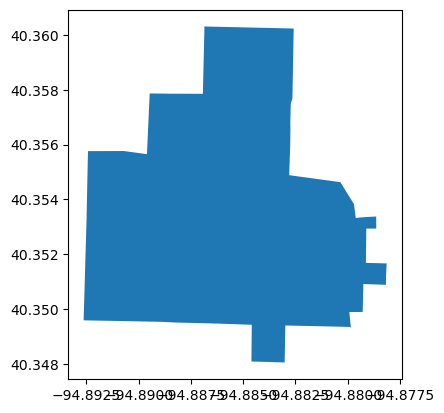

In [18]:
area.plot()

## Plotting all the data 

<AxesSubplot: >

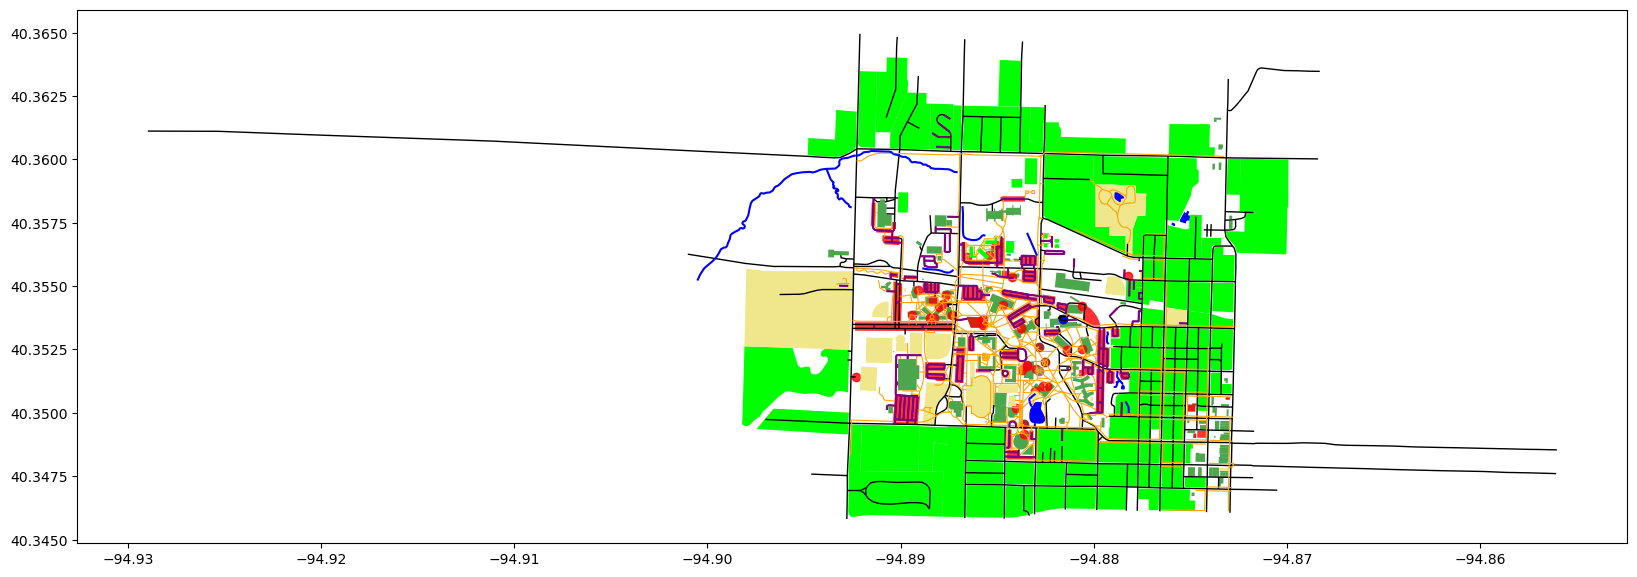

In [19]:
fig, ax = plt.subplots(figsize=(20,20))
# plot the area

# plot buildings
buildings.plot(ax=ax, facecolor='green', alpha=0.7)
# plot roads
roads.plot(ax=ax, linewidth=1, color='black')
# plot sidewalks
footway.plot(ax=ax, linewidth=0.8, color='orange')
# plot amenities
amenities.plot(ax=ax, color='red', alpha=0.8)
# plot landuse
landuse.plot(ax=ax, color='lime')
# plot parks
parks.plot(ax=ax, color='khaki')
# plot historic monuments
historic.plot(ax=ax, color='brown')
# plot natural wood chips pile
natural.plot(ax=ax, color='blue')
# plot artwork statue
artwork.plot(ax=ax, color='gray')
# plot parking aisle service
service.plot(ax=ax, color='purple')
# plot waterway ditches
waterways.plot(ax=ax, color='blue')

## Reproject the Coordinates

In [20]:
from pyproj import CRS

In [21]:
# Set projection
projection = CRS.from_epsg(4326)
# Re-project all layers
buildings = buildings.to_crs(projection)
roads = roads.to_crs(projection)
footway = footway.to_crs(projection)
amenities = amenities.to_crs(projection)
landuse = landuse.to_crs(projection)
parks = parks.to_crs(projection)
historic = historic.to_crs(projection)
natural = natural.to_crs(projection)
artwork = artwork.to_crs(projection)
service = service.to_crs(projection)
waterways = waterways.to_crs(projection)

<AxesSubplot: >

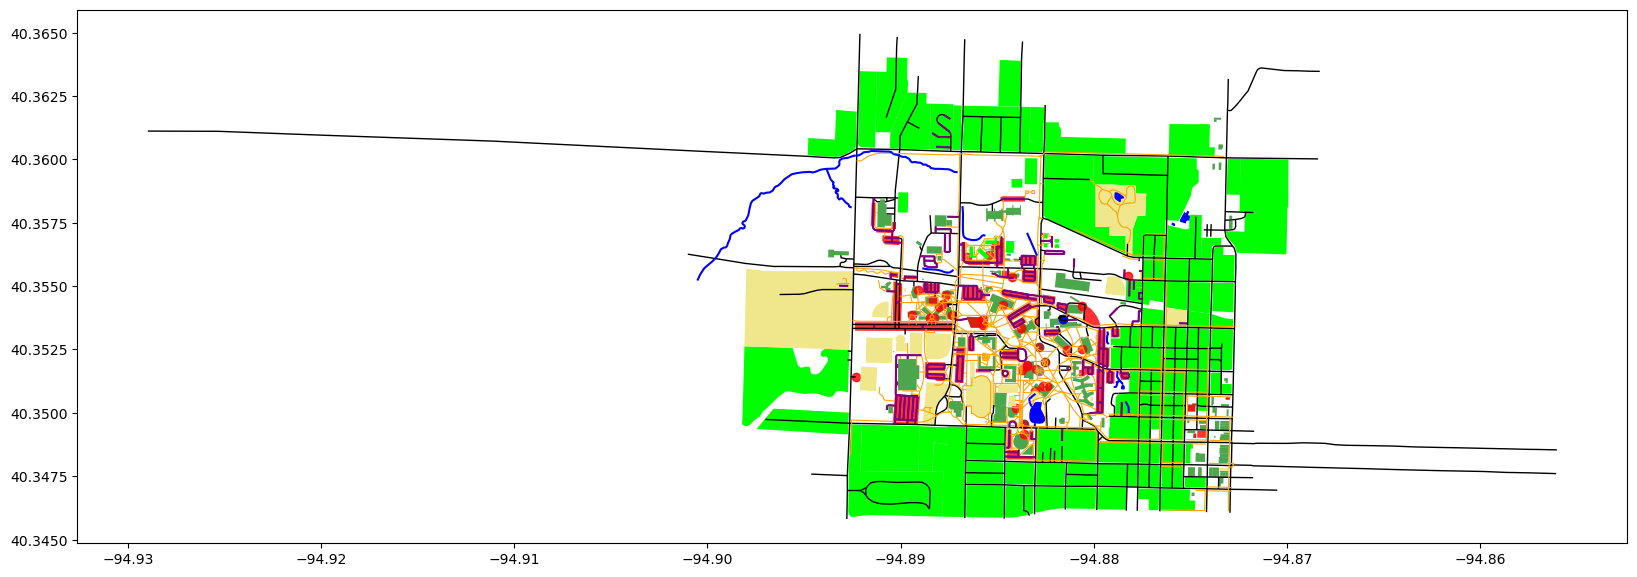

In [22]:
# replot with projection
fig, ax = plt.subplots(figsize=(20,20))

# plot buildings
buildings.plot(ax=ax, facecolor='green', alpha=0.7)
# plot roads
roads.plot(ax=ax, linewidth=1, color='black')
# plot sidewalks
footway.plot(ax=ax, linewidth=0.8, color='orange')
# plot amenities
amenities.plot(ax=ax, color='red', alpha=0.8)
# plot landuse
landuse.plot(ax=ax, color='lime')
# plot parks
parks.plot(ax=ax, color='khaki')
# plot historic monuments
historic.plot(ax=ax, color='brown')
# plot natural wood chips pile
natural.plot(ax=ax, color='blue')
# plot artwork statue
artwork.plot(ax=ax, color='gray')
# plot parking aisle service
service.plot(ax=ax, color='purple')
# plot waterway ditches
waterways.plot(ax=ax, color='blue')

In [23]:
roads.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Save as Shapefiles

In [39]:
import os
import geojson
import pyproj

In [45]:
#roads.to_file(roads, driver='GeoJSON', crs=('EPSG', '4326'))

## Save Dataframes to GeoJSON

In [46]:
with open('roads.geojson' , 'w') as file:
    file.write(roads.to_json())

In [47]:
with open('buildings.geojson' , 'w') as file:
    file.write(buildings.to_json())

In [48]:
with open('sidewalks.geojson' , 'w') as file:
    file.write(footway.to_json())

In [49]:
with open('amenities.geojson' , 'w') as file:
    file.write(amenities.to_json())

In [50]:
with open('landuse.geojson' , 'w') as file:
    file.write(landuse.to_json())

In [51]:
with open('parks.geojson' , 'w') as file:
    file.write(parks.to_json())

In [52]:
with open('historic.geojson' , 'w') as file:
    file.write(historic.to_json())

In [53]:
with open('natural.geojson' , 'w') as file:
    file.write(natural.to_json())

In [54]:
with open('artwork.geojson' , 'w') as file:
    file.write(artwork.to_json())

In [55]:
with open('parking.geojson' , 'w') as file:
    file.write(service.to_json())

In [56]:
with open('waterways.geojson' , 'w') as file:
    file.write(waterways.to_json())

In [ ]:
# project the graph
graph_proj = om.project_graph(college)

In [ ]:
# plot the graph
om.plot_graph(graph_proj)

In [ ]:
# Calculate basic statistics of the street network
stats = om.basic_stats(graph_proj)
stats

In [ ]:
# Network analysis
# Finding center most point in graph to most eastern point on graph where x point is the largest
nodes, edges = om.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [ ]:
# Calculate the centroid of street network as origin location
centroid = edges.unary_union.convex_hull.centroid

In [ ]:
centroid.x

In [ ]:
nodes.head()

In [ ]:
# Find the eastern most x coordinate and extract the row from df
max_x = nodes['x'].max()
max_x

In [ ]:
# locate max x coordinate in df and return every column from row in df
target_loc = nodes.loc[nodes['x']==max_x, :]
target_loc

In [ ]:
# Extract the geometry
target_point = target_loc.geometry.values[0]
target_point

In [ ]:
type(target_point)

In [ ]:
centroid.x # long

In [ ]:
centroid.y #lat

In [ ]:
# Extract the coordinates (x, y) from the origin and destination points
orig_xy = (centroid.x, centroid.y)
target_xy = (target_point.x, target_point.y)

In [ ]:
orig_xy

In [ ]:
orig = (340093.4956701813, 4468787.006379787)

In [ ]:
orig = list(orig)
orig

In [ ]:
target_xy

In [ ]:
target = (340884.7027902942, 4468007.998864496)

In [ ]:
dest = list(target)
dest

In [ ]:
# Define closest node to the origin location for routing
origin_node = om.nearest_nodes(graph_proj, X=centroid.x, Y=centroid.y)
origin_node

In [ ]:
target_node = om.nearest_nodes(graph_proj, X=target_point.x, Y=target_point.y)
target_node

In [ ]:
# Find the shortest path between orig node and target node
route = nx.shortest_path(G=graph_proj, source=origin_node, target=target_node, weight='length')

In [ ]:
# Calculate the distance
edge_lengths = om.utils_graph.get_route_edge_attributes(
    graph_proj, route, 'length')

In [ ]:
route_len_m = sum(edge_lengths)

In [ ]:
# plot to see accuracy of route to actual path
fig, ax = om.plot_graph_route(
    graph_proj, route, route_color='darkorange', show=False, close=False)

ax.scatter(
    graph_proj.nodes[origin_node]['x'], graph_proj.nodes[origin_node]['y'], 
    c='lime', s=100, label='orig')

ax.scatter(
    graph_proj.nodes[target_node]['x'], graph_proj.nodes[target_node]['y'],
    c='red', s=100, label='dest')

ax.scatter(
    orig[0], orig[1],
    color='yellow', marker='x', s=100, label='orig-point')

ax.scatter(
    dest[0], dest[1],
    color='blue', marker='x', s=100, label='dest-point')

plt.legend()
plt.show()

In [ ]:
# Extract information about nodes used in the shortest path in network
route_nodes = nodes.loc[route]
route_nodes

In [ ]:
route_nodes.columns

In [ ]:
type(route_nodes)

In [ ]:
# Visualize route_node path in a line format
from shapely.geometry import LineString, Point

In [ ]:
route_line = LineString(list(route_nodes.geometry.values)) 
# will return numpy array so convert to list for shapely to understand

In [ ]:
route_line

In [ ]:
edges.crs

In [ ]:
# Create a df from the LineString
route_geom = gpd.GeoDataFrame(route_nodes, geometry=gpd.points_from_xy(route_nodes['x'], route_nodes['y']), crs=edges.crs)
route_geom['geometry'] = None
route_geom['osmids'] = None

route_geom.loc[0, 'geometry'] = route_line
route_geom.loc[0, 'osmids'] = str(list(route_nodes['osmids'].values))
route_geom['length_m'] = route_geom.length

In [ ]:
# mappings buildings
college_address = "800 University Drive, Maryville, MO 64468"
buildings = om.geometries_from_address(college_address, tags= {'building': True}, dist=800)
buildings = buildings.to_crs(crs=edges.crs)

In [ ]:
buildings.crs

In [ ]:
edges.columns

In [ ]:
buildings.columns

In [ ]:
buildings.head(40)

In [ ]:
edges.shape

In [ ]:
edges.head(25)

In [ ]:
eg = edges.reset_index(level=[0,1,2])
eg

In [ ]:
type(eg)

In [ ]:
bd = buildings.reset_index(level=[0,1])
bd

In [ ]:
bd.columns

In [ ]:
eg.columns

In [ ]:
bd.name.unique()

In [ ]:
type(edges)

In [ ]:
# Convert each df to pd df
df1 = pd.DataFrame(eg.iloc[:,:].values, columns = list(eg.columns.values))
df1

In [ ]:
df2 = pd.DataFrame(bd.iloc[:,:].values, columns = list(bd.columns.values))
df2

In [ ]:
df2.columns.values

In [ ]:
df2.drop(columns=['element_type', 'amenity', 'source', 'layer', 'abandoned:building', 'man_made', 'office', 'leisure',
                 'sport', 'denomination', 'religion', 'wheelchair', 'public_transport', 'operator', 'atm', 'min_age'])

In [ ]:
df2.loc[df2['osmid']==191556763] #bd

In [ ]:
nd.loc[nd['osmid']==191556763]

In [ ]:
nodes.head(20)

In [ ]:
nodes.shape

In [ ]:
nodes.loc()

In [ ]:
nodes.columns

In [ ]:
nd = nodes.reset_index(level=[0])
nd

In [ ]:
nd.columns.values

In [ ]:
buildings.columns

In [ ]:
buildings['osmids'].unique()

In [ ]:
# merge nodes df and buildings df based on osmids
df = pd.merge(['nodes', 'buildings'], how='inner', on=)

In [ ]:
df = buildings.loc[buildings['name'] == "Jones Student Union"]

In [ ]:
df1 = buildings.loc[buildings['name'] == "Colden Hall"]

In [ ]:
target = df1['nodes'].astype(str)
target = ' '.join(target)
target = eval(target)
t

In [ ]:
type(df1)

In [ ]:
df3 = pd.concat([df,df1], ignore_index=True)

In [ ]:
df3.head()

In [ ]:
source = df['nodes'].astype(str)
source = ' '.join(source)
source

In [ ]:
type(source)

In [ ]:
G = nx.from_pandas_edgelist(df3, source=source, target=target)

In [ ]:
buildings.name.unique()

In [ ]:
# drop irrelevant buildings outside of campus from buildings df
#indexBuilding = buildings[(buildings['name']=='nan') | (buildings['name']=='First Christian Church') | (buildings['name']=='Wabash Station (historic)') | (buildings['name']=='Maryville Post Office') | (buildings['name']=='Nodaway County Treasurer') | (buildings['name']=='Nodaway Valley Bank') | (buildings['name']=='The Palms') |
                         (buildings['name']=='The Outback') | (buildings['name']=='The Pub') | (buildings['name']=="Casey's General Store") | (buildings['name']=='Wesley Campus Ministry Center') | (buildings['name']=='Regional Council of Governments') | (buildings['name']=="Geist Heating & AC Inc.") | 
                         (buildings['name']=='Simply Siam')]

In [ ]:
nodes.columns

In [ ]:
# plot the route with buildings and roads
fig, ax = plt.subplots()
edges.plot(ax=ax, linewidth=1, edgecolor='gray')
nodes.plot(ax=ax, markersize=2, color='black')
buildings.plot(ax=ax, facecolor='khaki', alpha=0.7)
route_geom.plot(ax=ax, linewidth=3, linestyle='--', color='orange')

# Build Map with Folium

In [ ]:
import folium

In [ ]:
location = [40.35260138964567, -94.88247789687222]
location2 = 
m = folium.Map(location=[40.35260138964567, -94.88247789687222])
folium.Marker().add_to(m)
m